In [9]:
# CICIDS2017数据集探索 - Monday-WorkingHours.pcap_ISCX

## 导入必要的库
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

# 设置更好的图表样式
plt.style.use('ggplot')
sns.set(style="whitegrid")

## 设置数据路径
data_dir = '/root/autodl-tmp/projects/DL/dataset/extracted/MachineLearningCVE'
# 获取所有CSV文件
csv_files = glob(os.path.join(data_dir, "*.csv"))

In [10]:
## 1. 选择文件进行详细分析 - Monday-WorkingHours.pcap_ISCX
selected_file = os.path.join(data_dir, "Monday-WorkingHours.pcap_ISCX.csv")

def load_and_explore_file(file_path):
    """加载并探索单个CSV文件"""
    print(f"\n正在分析文件: {os.path.basename(file_path)}")
    
    # 尝试使用不同的编码读取文件
    encodings = ['utf-8', 'latin1', 'iso-8859-1', 'cp1252']
    df = None
    
    for encoding in encodings:
        try:
            df = pd.read_csv(file_path, encoding=encoding)
            print(f"成功使用 {encoding} 编码读取文件")
            break
        except:
            continue
    
    if df is None:
        print("无法读取文件，请检查文件路径或格式")
        return None
    
    # 基本信息
    print("\n数据基本信息:")
    print(f"数据形状: {df.shape} (行 × 列)")
    print(f"列数量: {len(df.columns)}")
    
    return df

# 加载所选文件
df = load_and_explore_file(selected_file)


正在分析文件: Monday-WorkingHours.pcap_ISCX.csv
成功使用 utf-8 编码读取文件

数据基本信息:
数据形状: (529918, 79) (行 × 列)
列数量: 79


In [11]:
## 2. 数据预览

# 显示前几行数据
print("数据前5行:")
df.head()

数据前5行:


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,49188,4,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,49188,1,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,49188,1,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,49188,1,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,49486,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [12]:
## 3. 数据类型和基本统计

# 显示数据类型
print("\n数据类型信息:")
df.dtypes

# 数值列的基本统计
print("\n数值列统计摘要:")
df.describe()


数据类型信息:

数值列统计摘要:


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,529918.000000,5.299180e+05,529918.000000,529918.000000,5.299180e+05,5.299180e+05,529918.000000,529918.000000,529918.000000,529918.000000,...,529918.000000,5.299180e+05,5.299180e+05,5.299180e+05,5.299180e+05,5.299180e+05,5.299180e+05,5.299180e+05,5.299180e+05,5.299180e+05
mean,10644.367112,1.038927e+07,10.390315,11.517105,5.324195e+02,1.789841e+04,190.897188,20.277279,50.744078,57.452269,...,7.412509,-3.614576e+03,6.843482e+04,4.321930e+04,1.453907e+05,4.380369e+04,3.463918e+06,2.024408e+05,3.620657e+06,3.274066e+06
std,21390.213475,2.875195e+07,892.412791,1173.318788,6.228642e+03,2.675470e+06,448.833754,36.275793,91.964713,146.518081,...,851.762351,5.526328e+05,5.872322e+05,3.971455e+05,1.028606e+06,4.993677e+05,1.297057e+07,2.170149e+06,1.340649e+07,1.273216e+07
min,0.000000,-1.000000e+00,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,-8.388531e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,53.000000,1.760000e+02,2.000000,1.000000,1.800000e+01,0.000000e+00,6.000000,0.000000,6.000000,0.000000,...,0.000000,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,80.000000,3.130300e+04,2.000000,2.000000,6.800000e+01,1.440000e+02,40.000000,6.000000,38.000000,0.000000,...,1.000000,3.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,443.000000,3.557448e+05,4.000000,3.000000,1.870000e+02,3.920000e+02,83.000000,40.000000,53.000000,26.162951,...,3.000000,3.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,65535.000000,1.200000e+08,219759.000000,291922.000000,1.323378e+06,6.554530e+08,23360.000000,2293.000000,4638.923469,7125.596846,...,213557.000000,1.260000e+02,1.016597e+08,6.434950e+07,1.016597e+08,1.016597e+08,1.199997e+08,7.514502e+07,1.199997e+08,1.199997e+08



缺失值情况:
Flow Bytes/s    64
dtype: int64


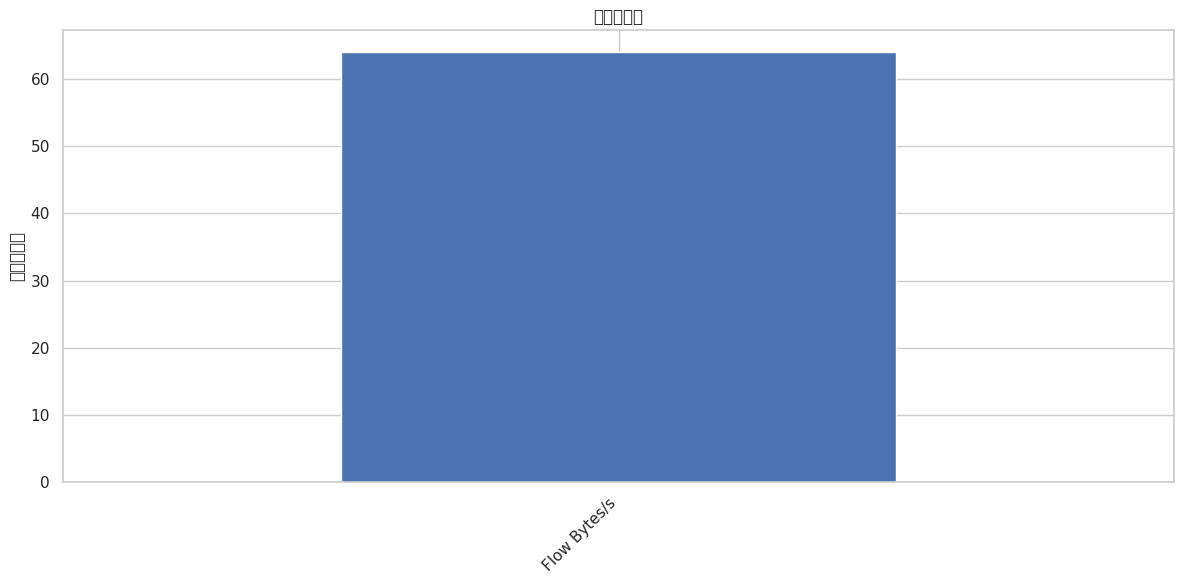


存在无穷值的列:
- Flow Bytes/s: 正无穷: 373, 负无穷: 0
-  Flow Packets/s: 正无穷: 437, 负无穷: 0


In [13]:
## 4. 检查缺失值和无穷值

# 检查缺失值
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]

if len(missing_values) > 0:
    print("\n缺失值情况:")
    print(missing_values)
    
    # 可视化缺失值
    plt.figure(figsize=(12, 6))
    missing_values.plot(kind='bar')
    plt.title('缺失值分布')
    plt.ylabel('缺失值数量')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("\n没有发现缺失值")

# 检查无穷值
def check_infinite_values(df):
    """检查无穷值"""
    inf_count = {}
    
    for col in df.select_dtypes(include=[np.number]).columns:
        pos_inf = (df[col] == np.inf).sum()
        neg_inf = (df[col] == -np.inf).sum()
        
        if pos_inf > 0 or neg_inf > 0:
            inf_count[col] = {'positive_inf': pos_inf, 'negative_inf': neg_inf}
    
    return inf_count

inf_values = check_infinite_values(df)

if inf_values:
    print("\n存在无穷值的列:")
    for col, counts in inf_values.items():
        print(f"- {col}: 正无穷: {counts['positive_inf']}, 负无穷: {counts['negative_inf']}")
else:
    print("\n没有发现无穷值")


标签分布:
BENIGN    529918
Name:  Label, dtype: int64


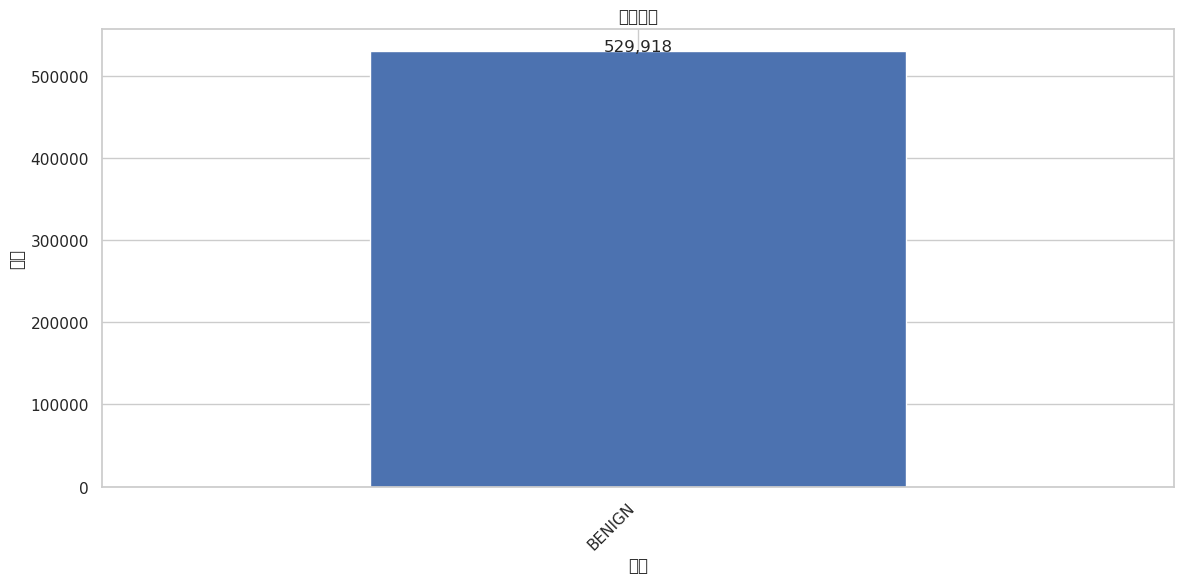

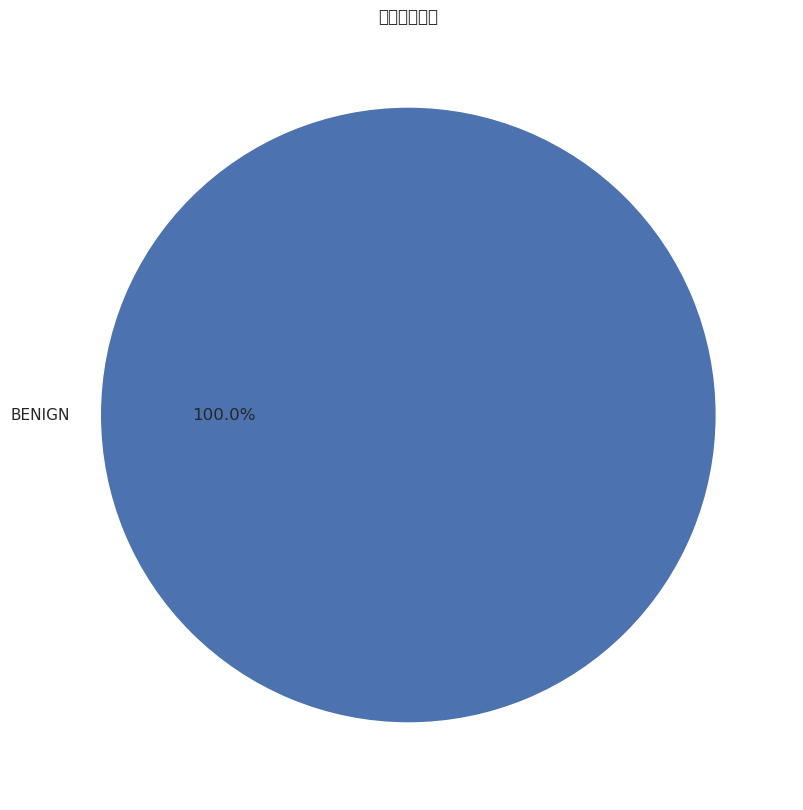

In [14]:
## 5. 标签分布分析

# 检查是否存在Label列
if ' Label' in df.columns:
    print("\n标签分布:")
    label_counts = df[' Label'].value_counts()
    print(label_counts)
    
    # 可视化标签分布
    plt.figure(figsize=(12, 6))
    label_counts.plot(kind='bar')
    plt.title('标签分布')
    plt.ylabel('数量')
    plt.xlabel('类别')
    plt.xticks(rotation=45, ha='right')
    
    # 在柱子上显示具体数值
    for i, v in enumerate(label_counts):
        plt.text(i, v + 10, f"{v:,}", ha='center')
    
    plt.tight_layout()
    plt.show()
    
    # 饼图显示标签分布比例
    plt.figure(figsize=(10, 10))
    label_counts.plot(kind='pie', autopct='%1.1f%%')
    plt.title('标签分布比例')
    plt.ylabel('')
    plt.show()
else:
    print("\n未发现标准标签列")


只选择前15个数值特征进行相关性分析 (共 78 个)

特征相关性分析:


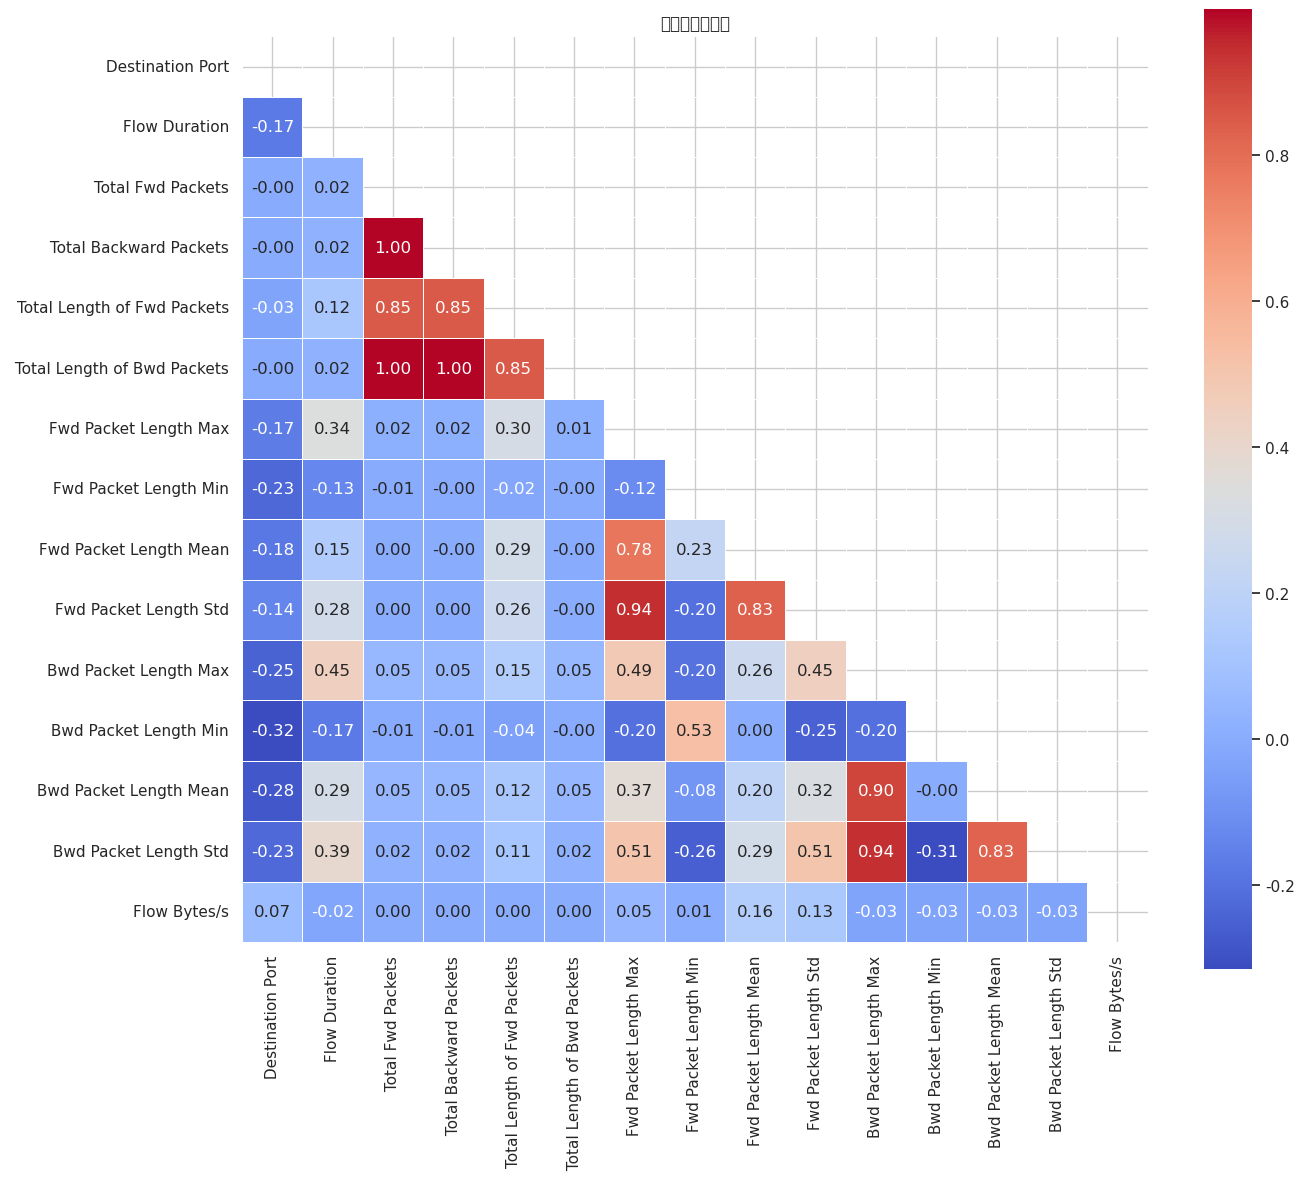


高度相关的特征对 (|相关系数| > 0.8):
-  Total Fwd Packets 和  Total Backward Packets: 1.00
-  Total Fwd Packets 和 Total Length of Fwd Packets: 0.85
-  Total Fwd Packets 和  Total Length of Bwd Packets: 1.00
-  Total Backward Packets 和 Total Length of Fwd Packets: 0.85
-  Total Backward Packets 和  Total Length of Bwd Packets: 1.00
- Total Length of Fwd Packets 和  Total Length of Bwd Packets: 0.85
-  Fwd Packet Length Max 和  Fwd Packet Length Std: 0.94
-  Fwd Packet Length Mean 和  Fwd Packet Length Std: 0.83
- Bwd Packet Length Max 和  Bwd Packet Length Mean: 0.90
- Bwd Packet Length Max 和  Bwd Packet Length Std: 0.94
-  Bwd Packet Length Mean 和  Bwd Packet Length Std: 0.83


In [15]:
## 6. 特征相关性分析

# 选择数值型列
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# 如果数值特征过多，只选择部分
if len(numeric_cols) > 15:
    print(f"\n只选择前15个数值特征进行相关性分析 (共 {len(numeric_cols)} 个)")
    numeric_cols = numeric_cols[:15]

# 计算相关性矩阵
if len(numeric_cols) > 1:
    print("\n特征相关性分析:")
    corr = df[numeric_cols].corr()
    
    # 绘制相关性热图
    plt.figure(figsize=(14, 12))
    mask = np.triu(np.ones_like(corr, dtype=bool))
    sns.heatmap(corr, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', 
               square=True, linewidths=.5)
    plt.title('特征相关性热图')
    plt.tight_layout()
    plt.show()
    
    # 找出高度相关的特征
    high_corr = []
    for i in range(len(corr.columns)):
        for j in range(i+1, len(corr.columns)):
            if abs(corr.iloc[i, j]) > 0.8:
                high_corr.append((corr.columns[i], corr.columns[j], corr.iloc[i, j]))
    
    if high_corr:
        print("\n高度相关的特征对 (|相关系数| > 0.8):")
        for feat1, feat2, corr_val in high_corr:
            print(f"- {feat1} 和 {feat2}: {corr_val:.2f}")



特征分布分析:


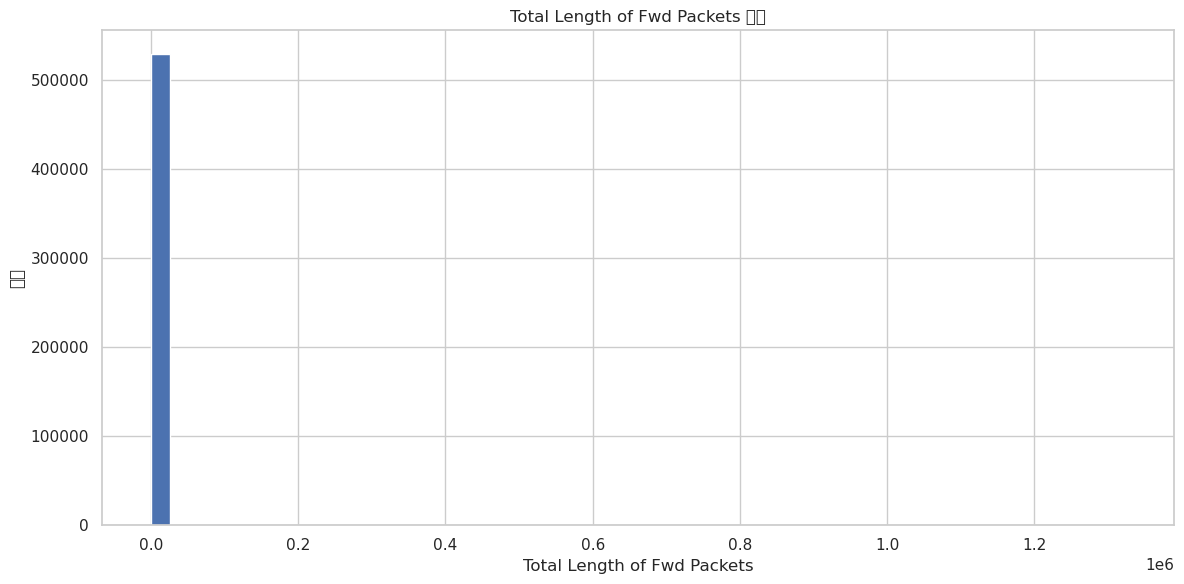

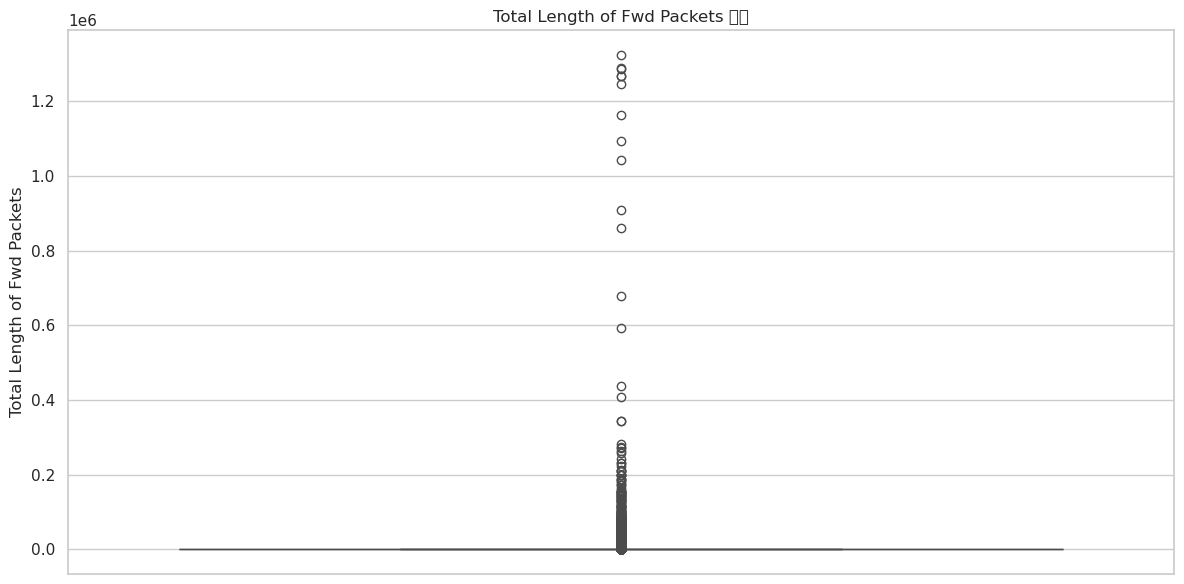

In [16]:
## 7. 特征分布分析

# 选择一些重要的数值特征进行分布分析
important_features = ['Flow Duration', 'Total Fwd Packets', 'Total Backward Packets',
                     'Total Length of Fwd Packets', 'Total Length of Bwd Packets']

# 确保这些特征确实存在
available_features = [f for f in important_features if f in df.columns]

# 如果找不到预定义的重要特征，则选择前几个数值特征
if not available_features and len(numeric_cols) > 0:
    available_features = numeric_cols[:5]  # 只取前5个

if available_features:
    print("\n特征分布分析:")
    
    # 绘制直方图
    for feature in available_features:
        plt.figure(figsize=(12, 6))
        
        # 正常数据的分布 (如果有Label列)
        if 'Label' in df.columns:
            normal_data = df[df['Label'] == 'BENIGN'][feature]
            attack_data = df[df['Label'] != 'BENIGN'][feature]
            
            plt.hist(normal_data, bins=50, alpha=0.5, label='正常')
            plt.hist(attack_data, bins=50, alpha=0.5, label='攻击')
            plt.legend()
        else:
            plt.hist(df[feature], bins=50)
        
        plt.title(f'{feature} 分布')
        plt.xlabel(feature)
        plt.ylabel('频率')
        plt.tight_layout()
        plt.show()
        
        # 箱线图
        plt.figure(figsize=(12, 6))
        if 'Label' in df.columns:
            sns.boxplot(x='Label', y=feature, data=df)
            plt.title(f'{feature} 在不同类别的分布')
            plt.xticks(rotation=45, ha='right')
        else:
            sns.boxplot(y=feature, data=df)
            plt.title(f'{feature} 分布')
        plt.tight_layout()
        plt.show()